In [293]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [294]:
#import pandas to get data
import pandas as pd

In [360]:
churn = pd.read_csv("C:/Users/torim/Documents/enterprise/WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn = churn.drop([488,753,936,1082,1340,3331,3826,4380,5218,6670,6754])

In [361]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [362]:
churn.dropna()
churn=churn[churn.tenure>0]

In [363]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null object
Churn               7032 non-null object
dtypes: float64(1), int64(2), obj

In [364]:
churn["InternetService"].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [365]:
churn["OnlineSecurity"].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

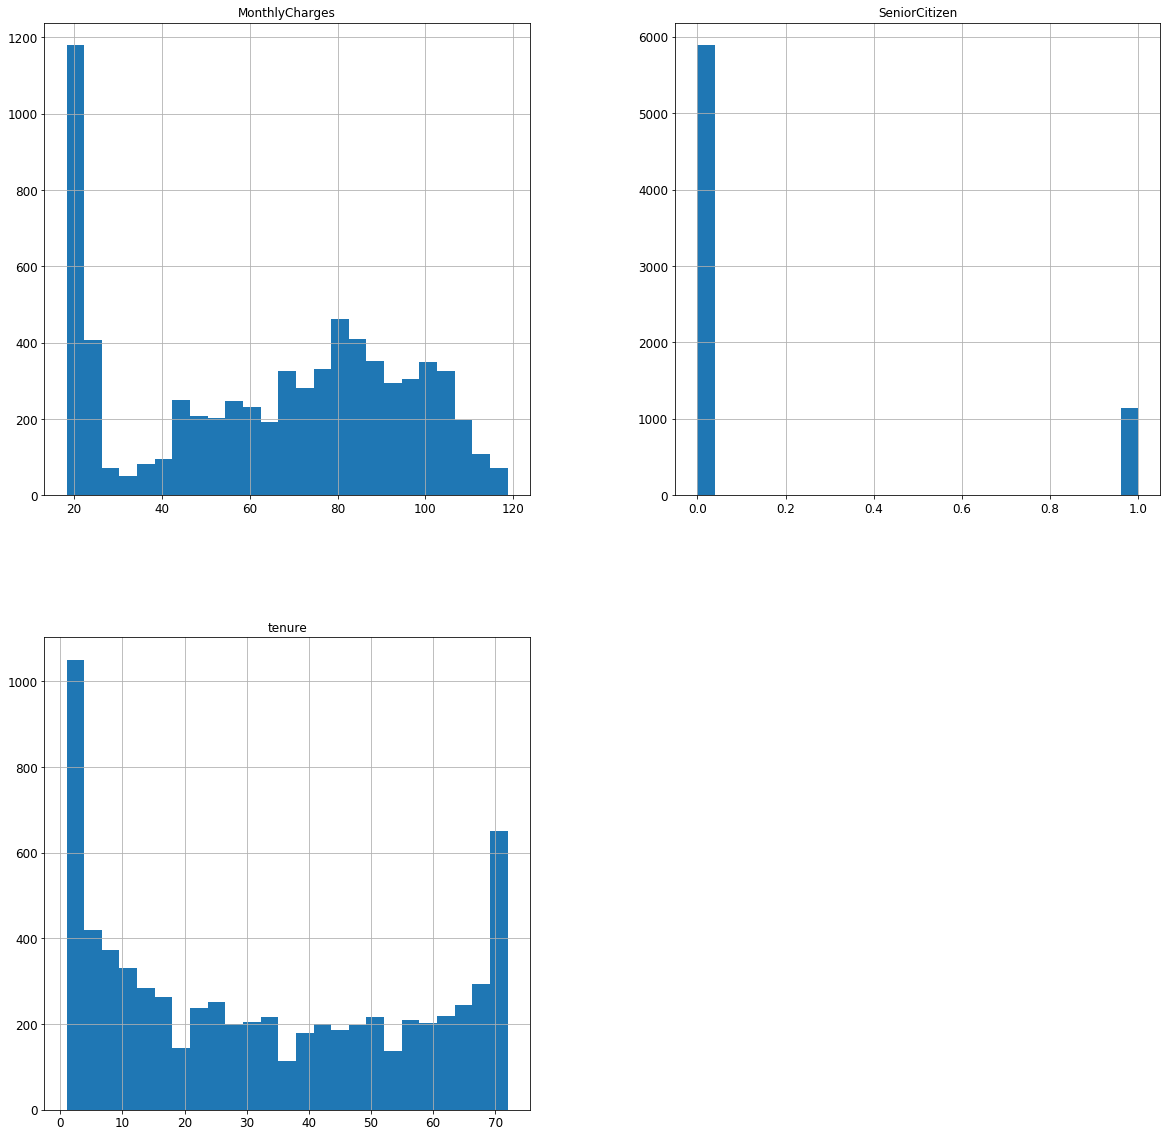

In [366]:
#plotting with matplotlib

%matplotlib inline
import matplotlib.pyplot as plt
churn.hist(bins=25, figsize=(20,20))
plt.show()

In [367]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [368]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [369]:
train_set, test_set = split_train_test(churn, 0.2)
print(len(train_set), "train +", len(test_set), "test")

5626 train + 1406 test


In [370]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [371]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [372]:
churn_with_index = churn.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(churn_with_index, 0.2, "index")

In [373]:

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(churn, test_size=0.2, random_state=42)

In [374]:
test_set.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2481,6614-YWYSC,Male,1,Yes,No,61,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.00,1501.75,No
6784,9546-KDTRB,Female,0,No,No,19,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.70,465.85,No
6125,0871-URUWO,Male,0,Yes,No,13,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.25,1359,Yes
3052,5151-HQRDG,Male,0,Yes,No,37,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,55.05,2030.75,No
4099,6624-JDRDS,Female,0,No,No,6,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45,No


In [375]:
churn["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
16     80
64     80
52     80
     ... 
29     72
20     71
53     70
62     70
41     70
32     69
47     68
51     68
54     68
50     68
58     67
49     66
57     65
37     65
31     65
43     65
34     65
42     65
40     64
48     64
33     64
55     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

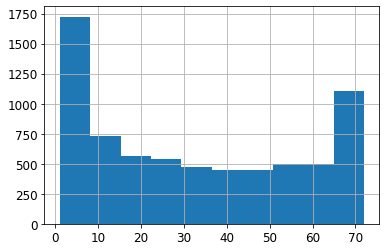

In [376]:
churn["tenure"].hist()

In [377]:
churn["tenure_cat"] = pd.cut(churn["tenure"],
                               bins=[0,5,10,15,20,25,70,np.inf],
                               labels=[1, 2, 3, 4,5,6,7])
# Label those above 5 as 5
churn["tenure_cat"].where(churn["tenure_cat"] < 7, 7.0, inplace=True)

In [378]:
churn["tenure_cat"].value_counts()

6    3222
1    1360
2     599
7     532
3     500
5     411
4     408
Name: tenure_cat, dtype: int64

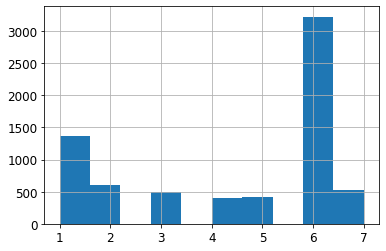

In [379]:
churn["tenure_cat"].hist()

In [380]:
churn["tenure_cat"].value_counts() / len(churn)

6    0.458191
1    0.193402
2    0.085182
7    0.075654
3    0.071104
5    0.058447
4    0.058020
Name: tenure_cat, dtype: float64

In [381]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(churn, churn["tenure_cat"]):
    strat_train_set = churn.loc[train_index]
    strat_test_set = churn.loc[test_index]

C:\Users\torim\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """
C:\Users\torim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [382]:
strat_test_set["tenure_cat"].value_counts() / len(strat_test_set)

6    0.456290
1    0.205402
2    0.079602
3    0.068230
4    0.063966
7    0.063255
5    0.062544
Name: tenure_cat, dtype: float64

In [383]:
churn["tenure_cat"].value_counts() / len(churn)

6    0.458191
1    0.193402
2    0.085182
7    0.075654
3    0.071104
5    0.058447
4    0.058020
Name: tenure_cat, dtype: float64

In [384]:
def tenure_cat_proportions(data):
    return data["tenure_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(churn, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": tenure_cat_proportions(churn),
    "Stratified": tenure_cat_proportions(strat_test_set),
    "Random": tenure_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [385]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.193402,0.205402,0.191187,-1.145115,6.204691
2,0.085182,0.079602,0.073205,-14.060036,-6.550719
3,0.071104,0.068230,0.072495,1.956503,-4.040938
4,0.058020,0.063966,0.071073,22.496760,10.247084
5,0.058447,0.062544,0.055437,-5.149954,7.010308
6,0.458191,0.456290,0.459844,0.360660,-0.414925
7,0.075654,0.063255,0.076759,1.460474,-16.389054


In [386]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("tenure_cat", axis=1, inplace=True)

In [387]:
#### Visualize Data

In [388]:
churn1 = strat_train_set.copy()
churn1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5882,2138-VFAPZ,Female,0.0,Yes,Yes,14.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.70,263.65,No
3614,8039-EQPIM,Male,0.0,Yes,No,69.0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),60.25,4055.5,No
923,9199-PWQVC,Female,0.0,Yes,No,63.0,Yes,Yes,DSL,Yes,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),79.70,4786.15,No
609,3419-SNJJD,Female,1.0,Yes,No,65.0,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),105.25,6786.4,Yes
5042,1561-BWHIN,Male,0.0,Yes,Yes,19.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.80,344.5,No


In [389]:
corr_matrix = churn1.corr()
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.006378,0.217116
tenure,0.006378,1.000000,0.240910
MonthlyCharges,0.217116,0.240910,1.000000


In [390]:
corr_matrix["tenure"].sort_values(ascending=False)

tenure            1.000000
MonthlyCharges    0.240910
SeniorCitizen     0.006378
Name: tenure, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000269447C79B0>,
      dtype=object)

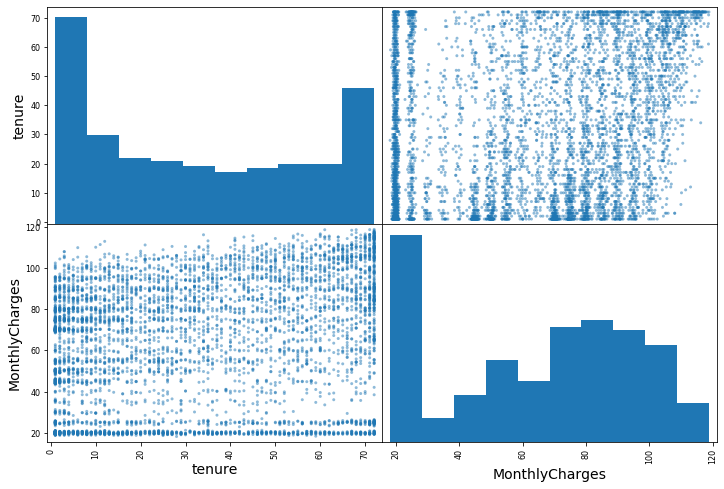

In [391]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Churn", "tenure", "MonthlyCharges",
              "gender","Dependents","PaperlessBilling"]
scatter_matrix(churn1[attributes], figsize=(12, 8))

[0, 80, 0, 150]

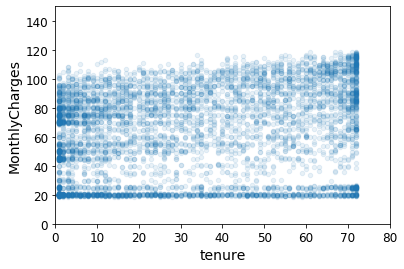

In [392]:
churn1.plot(kind="scatter", x="tenure", y="MonthlyCharges",
             alpha=0.1)
plt.axis([0, 80, 0, 150])

[15, 130, 0, 80]

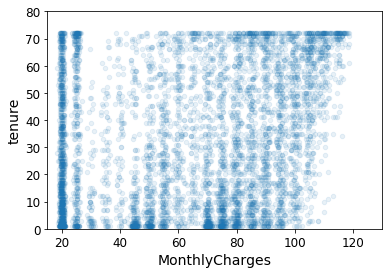

In [393]:
churn1.plot(kind="scatter", x="MonthlyCharges", y="tenure",
             alpha=0.1)
plt.axis([15, 130, 0, 80])

In [394]:
churn1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5615.000000,5615.000000,5615.000000
mean,0.164381,32.632235,64.778780
std,0.370654,24.597956,30.152966
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.475000
50%,0.000000,29.000000,70.350000
75%,0.000000,56.000000,89.850000
max,1.000000,72.000000,118.750000


In [395]:
#### Prep for machine learning 

In [396]:
#setting predictors and target variable
churn = strat_train_set.drop("Churn", axis=1) # drop labels for training set
churn_labels = strat_train_set["Churn"].copy()

In [397]:
#finding incomplete rows in data
sample_incomplete_rows = churn[churn.isnull().any(axis=1)].head()
sample_incomplete_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [398]:
sample_incomplete_rows.count()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [399]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5882,2138-VFAPZ,Female,0.0,Yes,Yes,14.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.70,263.65
3614,8039-EQPIM,Male,0.0,Yes,No,69.0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),60.25,4055.5
923,9199-PWQVC,Female,0.0,Yes,No,63.0,Yes,Yes,DSL,Yes,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),79.70,4786.15
609,3419-SNJJD,Female,1.0,Yes,No,65.0,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),105.25,6786.4
5042,1561-BWHIN,Male,0.0,Yes,Yes,19.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.80,344.5


In [400]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

In [401]:
churn_num=churn.select_dtypes(include=[np.number])

In [402]:
imputer.fit(churn_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [403]:
imputer.statistics_

array([ 0.  , 29.  , 70.35])

In [404]:
#checking that the numbers are the same manually
churn_num.median().values

array([ 0.  , 29.  , 70.35])

In [405]:
X = imputer.transform(churn_num)

In [406]:
churn_tr= pd.DataFrame(X, columns=churn_num.columns, index=churn.index)

In [407]:
churn_tr.loc[sample_incomplete_rows.index.values]

,SeniorCitizen,tenure,MonthlyCharges
3826,0.0,29.0,70.35
6754,0.0,29.0,70.35
6670,0.0,29.0,70.35
1340,0.0,29.0,70.35
936,0.0,29.0,70.35


In [408]:
imputer.strategy

'median'

In [409]:
churn_tr=pd.DataFrame(X, columns=churn_num.columns, index=churn_num.index)
churn_tr.head()

,SeniorCitizen,tenure,MonthlyCharges
5882,0.0,14.0,19.70
3614,0.0,69.0,60.25
923,0.0,63.0,79.70
609,1.0,65.0,105.25
5042,0.0,19.0,19.80


In [410]:
#categorical variables

In [411]:
churn_cat = churn[["MultipleLines", "InternetService","OnlineSecurity", "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]]

In [412]:
churn_cat.isnull().sum()

MultipleLines       10
InternetService     10
OnlineSecurity      10
OnlineBackup        10
DeviceProtection    10
TechSupport         10
StreamingTV         10
StreamingMovies     10
Contract            10
PaperlessBilling    10
PaymentMethod       10
dtype: int64

In [413]:
churn_cat=churn_cat.dropna()

In [414]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder(sparse=False)
churn_cat_1hot = cat_encoder.fit_transform(churn_cat)
churn_cat_1hot

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [415]:
cat_encoder.categories_

[array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [416]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [417]:
from sklearn.base import BaseEstimator, TransformerMixin

In [418]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

churn_num_tr = num_pipeline.fit_transform(churn_num)

In [419]:
churn_num_tr

array([[-0.44305693, -0.75793514, -1.49675045],
       [-0.44305693,  1.48016914, -0.15066481],
       [-0.44305693,  1.2360123 ,  0.49499156],
       ...,
       [ 2.25704627,  0.01522815,  0.63275372],
       [-0.44305693, -0.06615746,  0.20784875],
       [-0.44305693, -1.205556  , -1.4917711 ]])

In [424]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20
    
num_attribs = list(churn_num)
cat_attribs= ["PaperlessBilling"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

churn_prepared = full_pipeline.fit_transform(churn)


ValueError: Input contains NaN

In [421]:
churn_prepared

NameError: name 'churn_prepared' is not defined

In [117]:
airbnb_prepared.shape

(39116, 17)

In [118]:
#linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(airbnb_prepared, airbnb_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
#trying the full preprocessing pipeline on a sample of instances
some_data = airbnb.iloc[:5]
some_labels = airbnb_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 76.84360475 214.39052838 273.51273315 129.26263252 254.98900087]


In [120]:
print("Labels: ", list(some_labels))

Labels:  [45, 200, 289, 179, 75]


In [121]:
some_data_prepared

array([[ 0.62272675, -0.81491721, -0.78296264, -0.10865305, -0.24099598,
        -0.2061648 , -0.04055142, -0.12642071,  1.4710948 ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [-1.46605849, -0.6679094 ,  1.00309277, -0.48761892, -0.28868821,
        -0.31823836, -0.71796212, -0.18690423, -0.85554404,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [-0.40620626,  0.29006827,  1.44121988,  0.00659946, -0.19330375,
        -0.40789721, -0.46393311, -0.18690423,  1.9196951 ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [ 0.83281442,  1.8498301 ,  0.723718  ,  1.62425847, -0.28868821,
         0.75766779,  2.92963397, -0.15666247, -0.85554404,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        

In [122]:
#mean squared error
from sklearn.metrics import mean_squared_error

airbnb_predictions = lin_reg.predict(airbnb_prepared)
lin_mse = mean_squared_error(airbnb_labels, airbnb_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

233.22462655365266

In [123]:
#mean absolute error
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(airbnb_labels, airbnb_predictions)
lin_mae

74.01521754906538

In [124]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(airbnb_prepared, airbnb_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [125]:
airbnb_predictions = tree_reg.predict(airbnb_prepared)
tree_mse = mean_squared_error(airbnb_labels, airbnb_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [126]:
#tuning the model

In [127]:
#cross-validation score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, airbnb_prepared, airbnb_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [128]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [403.35072076 315.54060267 361.08769201 282.50218343 319.76981472
 266.31352608 285.73382271 277.72234165 342.64143153 377.38586761]
Mean: 323.2048003157332
Standard deviation: 44.28141833688742


In [129]:
lin_scores = cross_val_score(lin_reg, airbnb_prepared, airbnb_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [280.67641452 258.2067648  276.16784535 258.93658691 222.44886523
 205.08132404 144.09072737 182.14036253 195.77606281 268.11059396]
Mean: 229.163554751757
Standard deviation: 43.929629509200375


In [130]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(airbnb_prepared, airbnb_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [131]:
airbnb_predictions = forest_reg.predict(airbnb_prepared)
forest_mse = mean_squared_error(airbnb_labels, airbnb_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
#best MSE

105.54336106687609

In [132]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, airbnb_prepared, airbnb_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [296.27181062 286.74852513 284.54224747 249.97812603 238.97072604
 193.9977298  167.18579033 168.79356275 219.96083461 271.73934768]
Mean: 237.81887004424652
Standard deviation: 46.13722059986082


In [133]:
scores = cross_val_score(lin_reg, airbnb_prepared, airbnb_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count     10.000000
mean     229.163555
std       46.305895
min      144.090727
25%      198.102378
50%      240.327815
75%      265.817092
max      280.676415
dtype: float64

In [108]:
#SVR
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(airbnb_prepared, airbnb_labels)
airbnb_predictions = svm_reg.predict(airbnb_prepared)
svm_mse = mean_squared_error(airbnb_labels, airbnb_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

237.73693010733638

In [136]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [40,60,80], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(airbnb_prepared, airbnb_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [137]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 80}

In [138]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=80,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [139]:
#up to ten features
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=10),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(airbnb_prepared, airbnb_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [140]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

223.2088385394488 {'max_features': 7, 'n_estimators': 180}
223.53665944142944 {'max_features': 8, 'n_estimators': 189}
223.0885951999642 {'max_features': 5, 'n_estimators': 103}
222.65906867934603 {'max_features': 3, 'n_estimators': 75}
223.3772379692992 {'max_features': 8, 'n_estimators': 117}
222.47811584235566 {'max_features': 4, 'n_estimators': 104}
223.27926223054246 {'max_features': 8, 'n_estimators': 131}
224.0754916802366 {'max_features': 6, 'n_estimators': 53}
222.83406743036608 {'max_features': 2, 'n_estimators': 88}
222.45594986428782 {'max_features': 6, 'n_estimators': 130}


In [141]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.13731099, 0.14155578, 0.14550526, 0.16848628, 0.08382966,
       0.05171763, 0.06097945, 0.03932935, 0.08767488, 0.00055655,
       0.00553431, 0.01271387, 0.00427904, 0.00097312, 0.03072114,
       0.02605822, 0.00277447])

In [142]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_)
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.1684862798593258, 'longitude'),
 (0.1455052564861625, 'latitude'),
 (0.14155578064244162, 'host_id'),
 (0.1373109923336132, 'id'),
 (0.0876748754011145, 'availability_365'),
 (0.08382966418990742, 'minimum_nights'),
 (0.06097945051756008, 'reviews_per_month'),
 (0.05171763185587836, 'number_of_reviews'),
 (0.039329354448024184, 'calculated_host_listings_count'),
 (0.005534307648584168,
  array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)),
 (0.0005565530038350748,
  array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
        dtype=object))]

In [148]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [144]:
final_rmse

185.0185081486533

In [145]:
#computing the 95% confidence interval for the test RMSE

In [146]:
from scipy import stats

In [147]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([145.19840412, 217.67204725])

In [124]:
#lcl = 148.88 ucl=220.03

In [125]:
#confirm with manual calculation

In [126]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(148.88076974430788, 220.0325946012148)